In [123]:
import pandas as pd
from transformers import pipeline
import pandas as pd
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.metrics import  r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import  ColumnTransformer
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import StandardScaler

In [72]:
df= pd.read_csv(r'/content/test(in).csv')
df.head()

,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com


#task 1

In [73]:
df.shape

(2191, 4)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Subject  2191 non-null   object
 1   body     2191 non-null   object
 2   date     2191 non-null   object
 3   from     2191 non-null   object
dtypes: object(4)
memory usage: 68.6+ KB


In [75]:
df['date'] = pd.to_datetime(df['date'])

In [76]:
#sum of null values
df.isnull().sum()

,0
Subject,0
body,0
date,0
from,0


In [77]:
# the same record
df.duplicated().sum()

np.int64(0)

In [78]:
#convert no subject to
df.replace('(No Subject)',None, inplace= True)

In [79]:
df.isnull().sum()

,0
Subject,141
body,0
date,0
from,0


In [80]:
df.dropna(inplace= True)

In [81]:
#clear text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['body'] = df['body'].apply(clean_text)
df['Subject']=df['Subject'].str.replace('Re:','')
df['Subject']=df['Subject'].str.replace('RE:','')
df.dropna(inplace=True)

In [82]:
# add year and month columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [83]:
# transform email to name
df['from'] = df['from'].str.replace('.', ' ', regex=False)
df['from'] = df['from'].str.replace('@enron com', '', regex=False)
df['from'] = df['from'].str.replace('@ipgdirect com', '', regex=False)

In [84]:
#add len subject and body
def len_s(subject):
  return len(subject)
df['len_subject']= df['Subject'].apply(len_s)

def len_b(body):
  return len(body)
df['len_body']= df['body'].apply(len_s)

In [85]:
#drop subject have len equal 0
df['len_subject']=df['len_subject'].replace(0,None)
df.dropna(inplace=True)
#drop body have len equal 0
df['len_body']=df['len_body'].replace('',None)
df.dropna(inplace=True)

In [86]:
df.head()

,Subject,body,date,from,year,month,len_subject,len_body
0,EnronOptions Update!,enronoptions announcement we have updated the ...,2010-05-10,sally beck,2010,5,20,605
2,Phone Screen Interview - Shannon L. Burnham,when wednesday june am am gmt central time us ...,2011-07-25,sally beck,2011,7,44,65
3,My new work email,we were thinking papasitos we can meet somewhe...,2010-03-25,johnny palmer,2010,3,18,121
4,Bet,since you never gave me the for the last time ...,2011-05-21,lydia delgado,2011,5,3,183
5,Favor,sure just call me the bank that delivers we wi...,2011-10-23,eric bass,2011,10,6,102


In [87]:
# using transformer to labeling data
classifier = pipeline('sentiment-analysis', model="cardiffnlp/twitter-roberta-base-sentiment")

df['Sentiment'] = df['body'].apply(lambda x: classifier(x)[0]['label'])

df['Sentiment'] = df['Sentiment'].replace({
    'LABEL_0': 'Negative',
    'LABEL_1': 'Neutral',
    'LABEL_2': 'Positive'
})

Device set to use cpu


In [88]:
df.head()

,Subject,body,date,from,year,month,len_subject,len_body,Sentiment
0,EnronOptions Update!,enronoptions announcement we have updated the ...,2010-05-10,sally beck,2010,5,20,605,Positive
2,Phone Screen Interview - Shannon L. Burnham,when wednesday june am am gmt central time us ...,2011-07-25,sally beck,2011,7,44,65,Neutral
3,My new work email,we were thinking papasitos we can meet somewhe...,2010-03-25,johnny palmer,2010,3,18,121,Neutral
4,Bet,since you never gave me the for the last time ...,2011-05-21,lydia delgado,2011,5,3,183,Neutral
5,Favor,sure just call me the bank that delivers we wi...,2011-10-23,eric bass,2011,10,6,102,Neutral


#task 2

In [89]:
df['Sentiment'].value_counts()

,count
Sentiment,
Neutral,1264
Positive,588
Negative,105


Text(0.5, 1.0, 'sentiment')

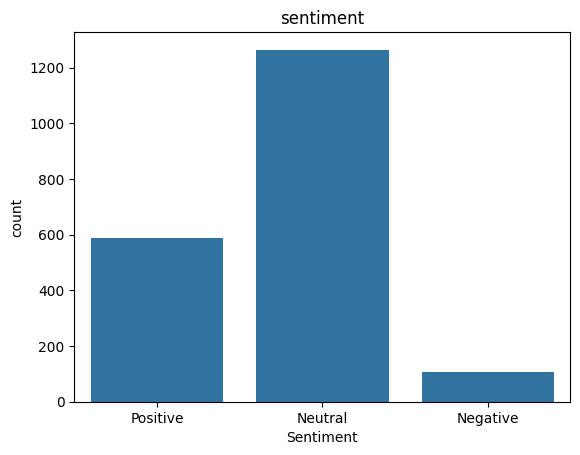

In [90]:
fig, ax = plt.subplots()
sns.countplot(x= df['Sentiment']).set_title('sentiment')

In [91]:
nega_year = df.groupby('year')['Sentiment'].apply(lambda x: (x == 'Negative').sum())
nega_year

,Sentiment
year,
2010,53
2011,52


Text(0.5, 1.0, 'negative')

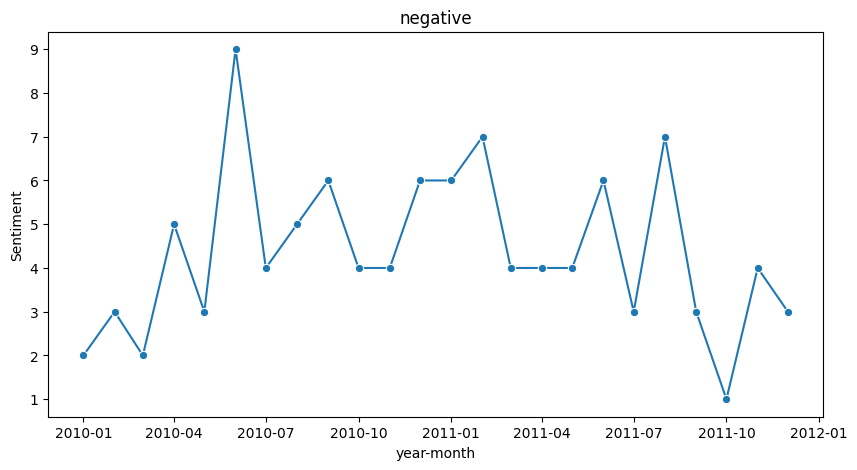

In [92]:
# plot negative of month
df['year-month'] = df['date'].dt.to_period('M')
nega_month = df.groupby('year-month')['Sentiment'].apply(lambda x: (x == 'Negative').sum())
nega_m = pd.DataFrame(nega_month,columns=['Sentiment']).reset_index()
nega_m['year-month'] = nega_m['year-month'].dt.to_timestamp()

plt.figure(figsize=(10, 5))
sns.lineplot(data=nega_m, x='year-month', y='Sentiment', marker='o').set_title('negative')

#task 3

In [93]:
# add column with score
score_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['Score'] = df['Sentiment'].map(score_map)


In [94]:
df.head()

,Subject,body,date,from,year,month,len_subject,len_body,Sentiment,year-month,Score
0,EnronOptions Update!,enronoptions announcement we have updated the ...,2010-05-10,sally beck,2010,5,20,605,Positive,2010-05,1
2,Phone Screen Interview - Shannon L. Burnham,when wednesday june am am gmt central time us ...,2011-07-25,sally beck,2011,7,44,65,Neutral,2011-07,0
3,My new work email,we were thinking papasitos we can meet somewhe...,2010-03-25,johnny palmer,2010,3,18,121,Neutral,2010-03,0
4,Bet,since you never gave me the for the last time ...,2011-05-21,lydia delgado,2011,5,3,183,Neutral,2011-05,0
5,Favor,sure just call me the bank that delivers we wi...,2011-10-23,eric bass,2011,10,6,102,Neutral,2011-10,0


In [95]:
#group by Year-month and sum of score
monthly_scores = df.groupby(['from', 'year-month'])['Score'].sum().reset_index()
monthly_scores.rename(columns={'from': 'Employee', 'Score': 'Monthly_Score'}, inplace=True)


In [96]:
monthly_scores

,Employee,year-month,Monthly_Score
0,bobette riner,2010-01,0
1,bobette riner,2010-02,3
2,bobette riner,2010-03,2
3,bobette riner,2010-04,1
4,bobette riner,2010-05,2
...,...,...,...
232,sally beck,2011-08,0
233,sally beck,2011-09,0
234,sally beck,2011-10,4
235,sally beck,2011-11,3


#task 4

In [97]:
# get 3 employee have high score about negative
monthly_scores['year-month']= monthly_scores['year-month'].astype(str)
data= pd.DataFrame(columns=['Employee', 'year-month', 'Monthly_Score'])
for i in range(10,12):
    for j in range(1,13):
      if j < 10:
         l=monthly_scores[monthly_scores['year-month']==f'20{i}-0{j}']
         l=l.sort_values(by='Monthly_Score', ascending=False)[0:3]
         data = pd.concat([data,l], ignore_index=True)
      else:
         l=monthly_scores[monthly_scores['year-month']==f'20{i}-{j}']
         l=l.sort_values(by='Monthly_Score', ascending=False)[0:3]
         data = pd.concat([data,l], ignore_index=True)

In [98]:
data

,Employee,year-month,Monthly_Score
0,kayne coulter,2010-01,5
1,patti thompson,2010-01,4
2,eric bass,2010-01,3
3,don baughman,2010-02,4
4,bobette riner,2010-02,3
...,...,...,...
67,bobette riner,2011-11,3
68,sally beck,2011-11,3
69,lydia delgado,2011-12,6
70,kayne coulter,2011-12,4


<Axes: xlabel='Employee', ylabel='Monthly_Score'>

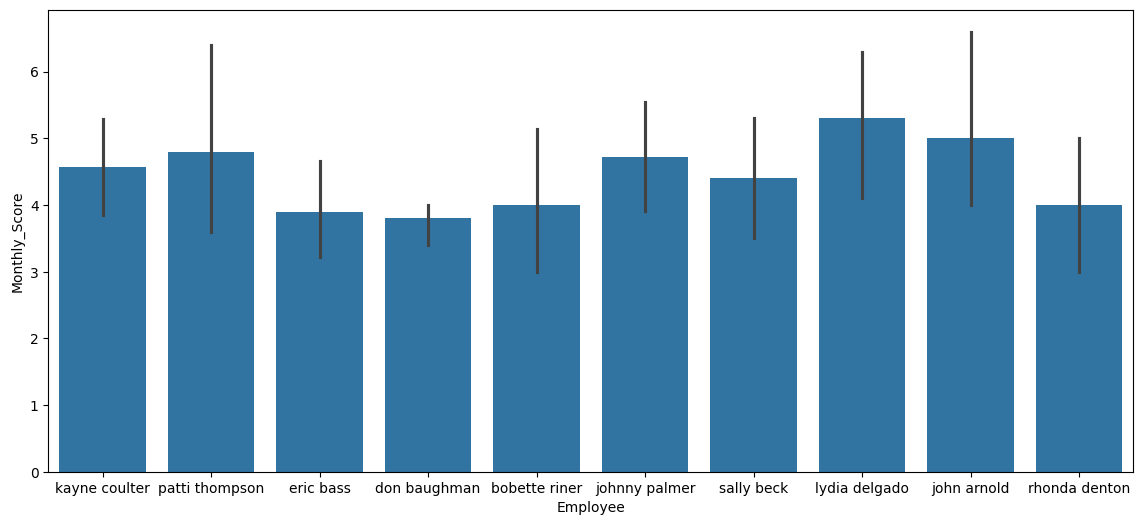

In [99]:
# plot negative score of employee
plt.figure(figsize=(14, 6))
sns.barplot(data=data, x='Employee', y='Monthly_Score')

#task 5

In [100]:
# get negative records
df_neg = df[df['Sentiment'] == 'Negative'].copy()

In [101]:
#creat function to get employee can quit
def detect_flight_risk(df_neg, min_negatives=4, window_days=30):
    risk_employees = set()

    for employee, group in df_neg.groupby('from'):
        dates = pd.to_datetime(group['date']).sort_values().reset_index(drop=True)

        for i in range(len(dates) - min_negatives + 1):
            window_start = dates[i]
            window_end = window_start + pd.Timedelta(days=window_days)

            in_window = dates[(dates >= window_start) & (dates <= window_end)]

            if len(in_window) >= min_negatives:
                risk_employees.add(employee)
                break

    return list(risk_employees)


In [102]:
flight_risk_employees = detect_flight_risk(df_neg)
flight_risk_df = pd.DataFrame({'Employee': flight_risk_employees})
flight_risk_df['Flight_Risk'] = True


In [103]:
flight_risk_df


,Employee,Flight_Risk
0,sally beck,True
1,john arnold,True


#task 6

In [104]:
#creat columns sum of word of body
df['word_count'] = df['body'].str.split().apply(len)

In [106]:
#group year-month and employee to predict
monthly_features = df.groupby(['from', 'year-month']).agg(
    msg_count=('body', 'count'),
    avg_length=('len_body', 'mean'),
    avg_word_count=('word_count', 'mean'),
    Monthly_Score=('Score', 'sum')
).reset_index()
monthly_features

,from,year-month,msg_count,avg_length,avg_word_count,Monthly_Score
0,bobette riner,2010-01,2,101.000000,17.500000,0
1,bobette riner,2010-02,12,222.083333,37.416667,3
2,bobette riner,2010-03,11,241.545455,41.727273,2
3,bobette riner,2010-04,6,189.833333,30.166667,1
4,bobette riner,2010-05,3,210.000000,38.333333,2
...,...,...,...,...,...,...
232,sally beck,2011-08,12,271.416667,48.750000,0
233,sally beck,2011-09,1,245.000000,50.000000,0
234,sally beck,2011-10,5,198.000000,35.200000,4
235,sally beck,2011-11,5,330.200000,59.800000,3


In [108]:
x= monthly_features[['msg_count', 'avg_length', 'avg_word_count']]
y =monthly_features['Monthly_Score']

In [112]:
#split data
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size=0.2, random_state= 42)

In [113]:
#built pipeline and train
trains_fo = ColumnTransformer(transformers=[
('trainsfo',StandardScaler(),['msg_count', 'avg_length', 'avg_word_count'])
])
model = Pipeline(steps=[
    ('trainsfo',trains_fo),
    ('model', LinearRegression())
])
model.fit(x_train,y_train)

Pipeline(steps=[('trainsfo',
                 ColumnTransformer(transformers=[('trainsfo', StandardScaler(),
                                                  ['msg_count', 'avg_length',
                                                   'avg_word_count'])])),
                ('model', LinearRegression())])

In [114]:
results= model.predict(x_test)
print(r2_score(y_test,results))

0.4040492686159304


In [124]:
mean_absolute_error(y_test,results)

1.1978693728215213

/tmp/ipython-input-122-4002178484.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results, hist=False).set_title('performance');
/tmp/ipython-input-122-4002178484.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False);


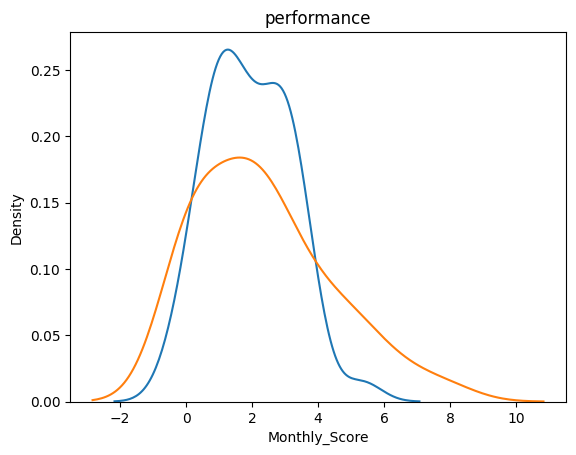

In [122]:
fig, ax = plt.subplots();
sns.distplot(results, hist=False).set_title('performance');
sns.distplot(y_test, hist=False);